In [1]:
import sympy as sy
from tabulate import tabulate 
import numpy as np
from sympy import *
import matplotlib.pyplot as plt


x_points= eval(input("list of x points: ")) # input titik-titik x
y_points= eval(input("list of y points: ")) # input titik-titik y
eval_x= eval(input("input x value to be approximated: ")) # input titik yang ingin dihitung nilai interpolasinya
xsy = sy.Symbol('x') #memunculkan simbol x menggunakan module sympy

method= eval(input("choose your preferred method.(1= Lagrange, 2=NDD): ")) #input pilihan metode interpolasi(interpolasi lagrange atau Newton divided different)
def LagrangePol(x,xpoints,ypoints): #mendefinisikan metode interpolasi lagrange
    pol = 0 #inisiasi awal bernilai 0                                                  
    n = len(xpoints) # n=banyak titik                                         
    for k in range(n):
        L = 1 #inisiasi nilai L(n,k) bernilai 1                                                 
        for i in range(n):
            if i!=k:
                L*=((x-xpoints[i])/(xpoints[k]-xpoints[i])) #proses perhitungan L(n,k)
        pol += ypoints[k]*L # aproksimasi nilai polinom dengan polinom Lagrange                                  
    return pol
if method==1: #jika memilih metode lagrange
    y_approx= LagrangePol(eval_x, x_points, y_points) #hasil aproksimasi Polinomial Interpolasi Lagrange
    Lagrange_polynomial= simplify(str(LagrangePol(xsy,x_points,y_points))) #hasil polinomial interpolasi dari metode lagrange
    print("Lagrange Polynomial : {0}".format(Lagrange_polynomial)) #memunculkan polinomial interpolasi Lagrange
    print("for x={0}, using Lagrange, y is approximately {1:.5f}".format(eval_x, y_approx)) #memunculkan hasil aproksimasi dengan metode lagrange


def DDTableGenerator(xpoints,ypoints) : #mendefinisikan fungsi untuk membuat table DD
    n = len(xpoints) #n adalah banyaknya titik
    DD = np.zeros((n,n)) #memberi nilai array dengan 0
    for k in range(0,n): #mulai mengisi tabel metode NDD
        DD[k][0]=y_points[k]
    for k in range(1,n): 
        for i in range (0,n-k):
            DD[i][k]=(DD[i+1][k-1]-DD[i][k-1])/(x_points[i+k]-x_points[i]) 
    return DD

def ForwardDD(x,xpoints,ypoints): #mendefinisikan fungsi metode forward NDD 
    DDTable = np.transpose(DDTableGenerator(xpoints,ypoints)) #mereverse sumbu dari array dan mengembalikan array yang telah termodifikasi
    pol = DDTable[0][0] #inisiasi suku pertama polinom
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-x0)(x−𝑥1)...(𝑥−𝑥(n−1))
    for k in range(1,len(DDTable)) :  
        mult_term*=(x-xpoints[k-1])#menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol += DDTable[k][0]*mult_term #menghitung nilai interpolasi forward NDD
    return pol

def BackwardDD(x,xpoints,ypoints) :#mendefinisikan fungsi metode backward NDD 
    DDTable = np.transpose(DDTableGenerator(xpoints,ypoints))  #mereverse sumbu dari array dan mengembalikan array yang telah termodifikasi
    pol = DDTable[0][-1] #inisiasi suku pertama polinom
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-xn)(x-x(n-1))...(x-x1)
    for k in range(1,len(DDTable)) : 
        mult_term*=(x-xpoints[-k]) #menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol += DDTable[k][-1]*mult_term #menghitung nilai interpolasi backward DD
    return pol

xsy = sy.Symbol('x') #memunculkan simbol x menggunakan module sympy       
if method==2: #jika memilih metode NDD
    NDD= eval(input("Forward=1, backward=2: ")) #memilih metode Forward NDD atau Backward NDD
    Table= str(input("Wanna print the DD Table?(y/n): ")).lower() #memilih print tabel DD atau tidak
    tabel_DD= DDTableGenerator(x_points,y_points) #pendefinisian tabel DD yang akan ditampilkan
    if Table== "y": #jika memilih menampilkan tabel
        print("Table Newton Divided Difference") #memberi judul tabel NDD
        judul=["y"] #memberi judul "y" pada tabel NDD
        for i in range (1, len(DDTableGenerator(x_points,y_points))): #menampilkan judul DD1, DD2, dst
            judul.append("DD"+str(i))
        print(tabulate(tabel_DD, headers=judul, tablefmt="fancy_grid")) #menampilkan isi tabel NDD
        
    if Table=='n': #jika memilih tidak menampilkan tabel
        print("")
        
    if NDD==1: #jika memilih metode Forward NDD
        y_approx = ForwardDD(eval_x,x_points,y_points) #menyimpan aproksimasi interpolasi forward NDD
        forw_polynomial = simplify(str(ForwardDD(xsy,x_points,y_points))) #menyimpan hasil polinomial interpolasi forward NDD
        print('Forward NDD Polynomial : {0}'.format(forw_polynomial)) #menampilkan hasil polinomial metode forward NDD
        print('for x = {0} using Forward NDD, y is approximately {1:.5f}'.format(eval_x,y_approx)) #menampilkan hasil aproksimasi metode forward NDD
       
    if NDD==2: #jika memilih metode Backward NDD
        y_approx= BackwardDD(eval_x, x_points, y_points) #menyimpan aproksimasi interpolasi backward NDD
        Back_polynomial= simplify(str(BackwardDD(xsy,x_points,y_points)))#menyimpan hasil polinomial interpolasi backward NDD
        print("Backward NDD Polynomial : {0}".format(Back_polynomial))  #menampilkan hasil polinomial metode backward NDD
        print("for x = {0}, using Backward NDD, y is approximately {1:.5f}". format(eval_x,y_approx))#menampilkan hasil aproksimasi metode backward NDD
        
show= eval(input("Show. (tabel=1, plot=2): ")) #memunculkan pilihan menampilkan tabel atau plot
if show==1: #jika memilih menampilkan tabel
    print("RESULT") #menampilkan judul tabel 
    a= np.append(x_points, eval_x) #menambahkan nilai sampai akhir dari array
    b= np.append(y_points, y_approx) 
    x= np.sort(a) #mengembalikan salinan array yang sudah diurutkan
    y= np.sort(b) 
    print(tabulate({'x':x,'y':y},headers='keys',tablefmt='fancy_grid')) #menampilkan tabel Result

if show==2: #jika memilih menampilkan plot
    x= x_points #menyimpan titik x di variabel x
    x1= eval_x #menyimpan titik yang ingin dihitung nilai interpolasinya di variabel x1
    y= y_points #menyimpan titik y di variabel y
    y1=y_approx #menyimpan nilai hasil interpolasi di variabel y1
    
    plt.plot(eval_x,y_approx,'r-o') #menampilkan plot titik yang diinterpolasikan
    plt.plot(x_points, y_points,'g-') #menampilkan plot fungsi/titik input
    plt.legend(['titik yang diinterpolasikan','fungsi/titik input'])
    plt.xlabel('x') #memberi label x pada plot
    plt.ylabel('y') #memberi label y pada plot
    plt.title('Grafik Input dan Polinomial Interpolasi') #judul dari plot
    plt.show() #menampilkan hasil plot interpolasi


list of x points: [2,3,4,5,6,8,9]
list of y points: [4,9,16,25,36,64,81]
input x value to be approximated: 7
choose your preferred method.(1= Lagrange, 2=NDD): 2
Forward=1, backward=2: 1
Wanna print the DD Table?(y/n): y
Table Newton Divided Difference
╒═════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│   y │   DD1 │   DD2 │   DD3 │   DD4 │   DD5 │   DD6 │
╞═════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│   4 │     5 │     1 │     0 │     0 │     0 │     0 │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│   9 │     7 │     1 │     0 │     0 │     0 │     0 │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  16 │     9 │     1 │     0 │     0 │     0 │     0 │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  25 │    11 │     1 │     0 │     0 │     0 │     0 │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  36 │    14 │     1 │     0 │     0 │     0 │     0 │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  64 │    17 │    

list of x points: [2,3,4,5,6,8,9]
list of y points: [4,9,16,25,36,64,81]
input x value to be approximated: 7
choose your preferred method.(1= Lagrange, 2=NDD): 2
Forward=1, backward=2: 1
Wanna print the DD Table?(y/n): y
Table Newton Divided Difference
╒═════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│   y │   DD1 │   DD2 │   DD3 │   DD4 │   DD5 │   DD6 │
╞═════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│   4 │     5 │     1 │     0 │     0 │     0 │     0 │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│   9 │     7 │     1 │     0 │     0 │     0 │     0 │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  16 │     9 │     1 │     0 │     0 │     0 │     0 │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  25 │    11 │     1 │     0 │     0 │     0 │     0 │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  36 │    14 │     1 │     0 │     0 │     0 │     0 │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  64 │    17 │    

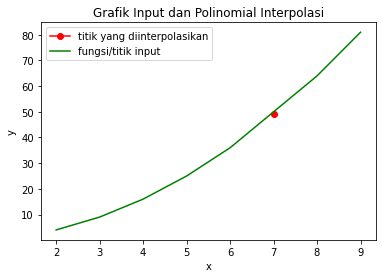

In [2]:
import sympy as sy
from tabulate import tabulate 
import numpy as np
from sympy import *
import matplotlib.pyplot as plt


x_points= eval(input("list of x points: ")) # input titik-titik x
y_points= eval(input("list of y points: ")) # input titik-titik y
eval_x= eval(input("input x value to be approximated: ")) # input titik yang ingin dihitung nilai interpolasinya
xsy = sy.Symbol('x') #memunculkan simbol x menggunakan module sympy

method= eval(input("choose your preferred method.(1= Lagrange, 2=NDD): ")) #input pilihan metode interpolasi(interpolasi lagrange atau Newton divided different)
def LagrangePol(x,xpoints,ypoints): #mendefinisikan metode interpolasi lagrange
    pol = 0 #inisiasi awal bernilai 0                                                  
    n = len(xpoints) # n=banyak titik                                         
    for k in range(n):
        L = 1 #inisiasi nilai L(n,k) bernilai 1                                                 
        for i in range(n):
            if i!=k:
                L*=((x-xpoints[i])/(xpoints[k]-xpoints[i])) #proses perhitungan L(n,k)
        pol += ypoints[k]*L # aproksimasi nilai polinom dengan polinom Lagrange                                  
    return pol
if method==1: #jika memilih metode lagrange
    y_approx= LagrangePol(eval_x, x_points, y_points) #hasil aproksimasi Polinomial Interpolasi Lagrange
    Lagrange_polynomial= simplify(str(LagrangePol(xsy,x_points,y_points))) #hasil polinomial interpolasi dari metode lagrange
    print("Lagrange Polynomial : {0}".format(Lagrange_polynomial)) #memunculkan polinomial interpolasi Lagrange
    print("for x={0}, using Lagrange, y is approximately {1:.5f}".format(eval_x, y_approx)) #memunculkan hasil aproksimasi dengan metode lagrange


def DDTableGenerator(xpoints,ypoints) : #mendefinisikan fungsi untuk membuat table DD
    n = len(xpoints) #n adalah banyaknya titik
    DD = np.zeros((n,n)) #memberi nilai array dengan 0
    for k in range(0,n): #mulai mengisi tabel metode NDD
        DD[k][0]=y_points[k]
    for k in range(1,n): 
        for i in range (0,n-k):
            DD[i][k]=(DD[i+1][k-1]-DD[i][k-1])/(x_points[i+k]-x_points[i]) 
    return DD

def ForwardDD(x,xpoints,ypoints): #mendefinisikan fungsi metode forward NDD 
    DDTable = np.transpose(DDTableGenerator(xpoints,ypoints)) #mereverse sumbu dari array dan mengembalikan array yang telah termodifikasi
    pol = DDTable[0][0] #inisiasi suku pertama polinom
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-x0)(x−𝑥1)...(𝑥−𝑥(n−1))
    for k in range(1,len(DDTable)) :  
        mult_term*=(x-xpoints[k-1])#menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol += DDTable[k][0]*mult_term #menghitung nilai interpolasi forward NDD
    return pol

def BackwardDD(x,xpoints,ypoints) :#mendefinisikan fungsi metode backward NDD 
    DDTable = np.transpose(DDTableGenerator(xpoints,ypoints))  #mereverse sumbu dari array dan mengembalikan array yang telah termodifikasi
    pol = DDTable[0][-1] #inisiasi suku pertama polinom
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-xn)(x-x(n-1))...(x-x1)
    for k in range(1,len(DDTable)) : 
        mult_term*=(x-xpoints[-k]) #menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol += DDTable[k][-1]*mult_term #menghitung nilai interpolasi backward DD
    return pol

xsy = sy.Symbol('x') #memunculkan simbol x menggunakan module sympy       
if method==2: #jika memilih metode NDD
    NDD= eval(input("Forward=1, backward=2: ")) #memilih metode Forward NDD atau Backward NDD
    Table= str(input("Wanna print the DD Table?(y/n): ")).lower() #memilih print tabel DD atau tidak
    tabel_DD= DDTableGenerator(x_points,y_points) #pendefinisian tabel DD yang akan ditampilkan
    if Table== "y": #jika memilih menampilkan tabel
        print("Table Newton Divided Difference") #memberi judul tabel NDD
        judul=["y"] #memberi judul "y" pada tabel NDD
        for i in range (1, len(DDTableGenerator(x_points,y_points))): #menampilkan judul DD1, DD2, dst
            judul.append("DD"+str(i))
        print(tabulate(tabel_DD, headers=judul, tablefmt="fancy_grid")) #menampilkan isi tabel NDD
        
    if Table=='n': #jika memilih tidak menampilkan tabel
        print("")
        
    if NDD==1: #jika memilih metode Forward NDD
        y_approx = ForwardDD(eval_x,x_points,y_points) #menyimpan aproksimasi interpolasi forward NDD
        forw_polynomial = simplify(str(ForwardDD(xsy,x_points,y_points))) #menyimpan hasil polinomial interpolasi forward NDD
        print('Forward NDD Polynomial : {0}'.format(forw_polynomial)) #menampilkan hasil polinomial metode forward NDD
        print('for x = {0} using Forward NDD, y is approximately {1:.5f}'.format(eval_x,y_approx)) #menampilkan hasil aproksimasi metode forward NDD
       
    if NDD==2: #jika memilih metode Backward NDD
        y_approx= BackwardDD(eval_x, x_points, y_points) #menyimpan aproksimasi interpolasi backward NDD
        Back_polynomial= simplify(str(BackwardDD(xsy,x_points,y_points)))#menyimpan hasil polinomial interpolasi backward NDD
        print("Backward NDD Polynomial : {0}".format(Back_polynomial))  #menampilkan hasil polinomial metode backward NDD
        print("for x = {0}, using Backward NDD, y is approximately {1:.5f}". format(eval_x,y_approx))#menampilkan hasil aproksimasi metode backward NDD
        
show= eval(input("Show. (tabel=1, plot=2): ")) #memunculkan pilihan menampilkan tabel atau plot
if show==1: #jika memilih menampilkan tabel
    print("RESULT") #menampilkan judul tabel 
    a= np.append(x_points, eval_x) #menambahkan nilai sampai akhir dari array
    b= np.append(y_points, y_approx) 
    x= np.sort(a) #mengembalikan salinan array yang sudah diurutkan
    y= np.sort(b) 
    print(tabulate({'x':x,'y':y},headers='keys',tablefmt='fancy_grid')) #menampilkan tabel Result

if show==2: #jika memilih menampilkan plot
    x= x_points #menyimpan titik x di variabel x
    x1= eval_x #menyimpan titik yang ingin dihitung nilai interpolasinya di variabel x1
    y= y_points #menyimpan titik y di variabel y
    y1=y_approx #menyimpan nilai hasil interpolasi di variabel y1
    
    plt.plot(eval_x,y_approx,'r-o') #menampilkan plot titik yang diinterpolasikan
    plt.plot(x_points, y_points,'g-') #menampilkan plot fungsi/titik input
    plt.legend(['titik yang diinterpolasikan','fungsi/titik input'])
    plt.xlabel('x') #memberi label x pada plot
    plt.ylabel('y') #memberi label y pada plot
    plt.title('Grafik Input dan Polinomial Interpolasi') #judul dari plot
    plt.show() #menampilkan hasil plot interpolasi

list of x points: [2,2.15,2.25,2.3,3.38,4.1,4.24,4.5]
list of y points: [4.9,6.4,8.1,14.1,18.1,22.1,24.9,29.1]
input x value to be approximated: 3.30
choose your preferred method.(1= Lagrange, 2=NDD): 1
Lagrange Polynomial : 269.799331865604*x**7 - 6104.14917877844*x**6 + 58230.4977178024*x**5 - 303330.788902979*x**4 + 931166.260016078*x**3 - 1683847.75827343*x**2 + 1660836.09152255*x - 689558.401638987
for x=3.3, using Lagrange, y is approximately 48.97769
Show. (tabel=1, plot=2): 2


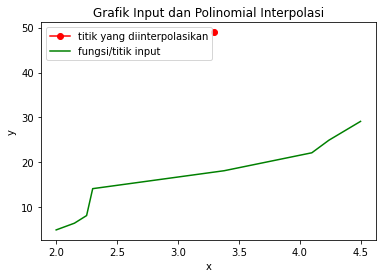

In [8]:
import sympy as sy
from tabulate import tabulate 
import numpy as np
from sympy import *
import matplotlib.pyplot as plt


x_points= eval(input("list of x points: ")) # input titik-titik x
y_points= eval(input("list of y points: ")) # input titik-titik y
eval_x= eval(input("input x value to be approximated: ")) # input titik yang ingin dihitung nilai interpolasinya
xsy = sy.Symbol('x') #memunculkan simbol x menggunakan module sympy

method= eval(input("choose your preferred method.(1= Lagrange, 2=NDD): ")) #input pilihan metode interpolasi(interpolasi lagrange atau Newton divided different)
def LagrangePol(x,xpoints,ypoints): #mendefinisikan metode interpolasi lagrange
    pol = 0 #inisiasi awal bernilai 0                                                  
    n = len(xpoints) # n=banyak titik                                         
    for k in range(n):
        L = 1 #inisiasi nilai L(n,k) bernilai 1                                                 
        for i in range(n):
            if i!=k:
                L*=((x-xpoints[i])/(xpoints[k]-xpoints[i])) #proses perhitungan L(n,k)
        pol += ypoints[k]*L # aproksimasi nilai polinom dengan polinom Lagrange                                  
    return pol
if method==1: #jika memilih metode lagrange
    y_approx= LagrangePol(eval_x, x_points, y_points) #hasil aproksimasi Polinomial Interpolasi Lagrange
    Lagrange_polynomial= simplify(str(LagrangePol(xsy,x_points,y_points))) #hasil polinomial interpolasi dari metode lagrange
    print("Lagrange Polynomial : {0}".format(Lagrange_polynomial)) #memunculkan polinomial interpolasi Lagrange
    print("for x={0}, using Lagrange, y is approximately {1:.5f}".format(eval_x, y_approx)) #memunculkan hasil aproksimasi dengan metode lagrange


def DDTableGenerator(xpoints,ypoints) : #mendefinisikan fungsi untuk membuat table DD
    n = len(xpoints) #n adalah banyaknya titik
    DD = np.zeros((n,n)) #memberi nilai array dengan 0
    for k in range(0,n): #mulai mengisi tabel metode NDD
        DD[k][0]=y_points[k]
    for k in range(1,n): 
        for i in range (0,n-k):
            DD[i][k]=(DD[i+1][k-1]-DD[i][k-1])/(x_points[i+k]-x_points[i]) 
    return DD

def ForwardDD(x,xpoints,ypoints): #mendefinisikan fungsi metode forward NDD 
    DDTable = np.transpose(DDTableGenerator(xpoints,ypoints)) #mereverse sumbu dari array dan mengembalikan array yang telah termodifikasi
    pol = DDTable[0][0] #inisiasi suku pertama polinom
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-x0)(x−𝑥1)...(𝑥−𝑥(n−1))
    for k in range(1,len(DDTable)) :  
        mult_term*=(x-xpoints[k-1])#menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol += DDTable[k][0]*mult_term #menghitung nilai interpolasi forward NDD
    return pol

def BackwardDD(x,xpoints,ypoints) :#mendefinisikan fungsi metode backward NDD 
    DDTable = np.transpose(DDTableGenerator(xpoints,ypoints))  #mereverse sumbu dari array dan mengembalikan array yang telah termodifikasi
    pol = DDTable[0][-1] #inisiasi suku pertama polinom
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-xn)(x-x(n-1))...(x-x1)
    for k in range(1,len(DDTable)) : 
        mult_term*=(x-xpoints[-k]) #menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol += DDTable[k][-1]*mult_term #menghitung nilai interpolasi backward DD
    return pol

xsy = sy.Symbol('x') #memunculkan simbol x menggunakan module sympy       
if method==2: #jika memilih metode NDD
    NDD= eval(input("Forward=1, backward=2: ")) #memilih metode Forward NDD atau Backward NDD
    Table= str(input("Wanna print the DD Table?(y/n): ")).lower() #memilih print tabel DD atau tidak
    tabel_DD= DDTableGenerator(x_points,y_points) #pendefinisian tabel DD yang akan ditampilkan
    if Table== "y": #jika memilih menampilkan tabel
        print("Table Newton Divided Difference") #memberi judul tabel NDD
        judul=["y"] #memberi judul "y" pada tabel NDD
        for i in range (1, len(DDTableGenerator(x_points,y_points))): #menampilkan judul DD1, DD2, dst
            judul.append("DD"+str(i))
        print(tabulate(tabel_DD, headers=judul, tablefmt="fancy_grid")) #menampilkan isi tabel NDD
        
    if Table=='n': #jika memilih tidak menampilkan tabel
        print("")
        
    if NDD==1: #jika memilih metode Forward NDD
        y_approx = ForwardDD(eval_x,x_points,y_points) #menyimpan aproksimasi interpolasi forward NDD
        forw_polynomial = simplify(str(ForwardDD(xsy,x_points,y_points))) #menyimpan hasil polinomial interpolasi forward NDD
        print('Forward NDD Polynomial : {0}'.format(forw_polynomial)) #menampilkan hasil polinomial metode forward NDD
        print('for x = {0} using Forward NDD, y is approximately {1:.5f}'.format(eval_x,y_approx)) #menampilkan hasil aproksimasi metode forward NDD
       
    if NDD==2: #jika memilih metode Backward NDD
        y_approx= BackwardDD(eval_x, x_points, y_points) #menyimpan aproksimasi interpolasi backward NDD
        Back_polynomial= simplify(str(BackwardDD(xsy,x_points,y_points)))#menyimpan hasil polinomial interpolasi backward NDD
        print("Backward NDD Polynomial : {0}".format(Back_polynomial))  #menampilkan hasil polinomial metode backward NDD
        print("for x = {0}, using Backward NDD, y is approximately {1:.5f}". format(eval_x,y_approx))#menampilkan hasil aproksimasi metode backward NDD
        
show= eval(input("Show. (tabel=1, plot=2): ")) #memunculkan pilihan menampilkan tabel atau plot
if show==1: #jika memilih menampilkan tabel
    print("RESULT") #menampilkan judul tabel 
    a= np.append(x_points, eval_x) #menambahkan nilai sampai akhir dari array
    b= np.append(y_points, y_approx) 
    x= np.sort(a) #mengembalikan salinan array yang sudah diurutkan
    y= np.sort(b) 
    print(tabulate({'x':x,'y':y},headers='keys',tablefmt='fancy_grid')) #menampilkan tabel Result

if show==2: #jika memilih menampilkan plot
    x= x_points #menyimpan titik x di variabel x
    x1= eval_x #menyimpan titik yang ingin dihitung nilai interpolasinya di variabel x1
    y= y_points #menyimpan titik y di variabel y
    y1=y_approx #menyimpan nilai hasil interpolasi di variabel y1
    
    plt.plot(eval_x,y_approx,'r-o') #menampilkan plot titik yang diinterpolasikan
    plt.plot(x_points, y_points,'g-') #menampilkan plot fungsi/titik input
    plt.legend(['titik yang diinterpolasikan','fungsi/titik input'])
    plt.xlabel('x') #memberi label x pada plot
    plt.ylabel('y') #memberi label y pada plot
    plt.title('Grafik Input dan Polinomial Interpolasi') #judul dari plot
    plt.show() #menampilkan hasil plot interpolasi

list of x points: [2,2.15,2.25,2.3,3.38,4.1,4.24,4.5]
list of y points: [4.9,6.4,8.1,14.1,18.1,22.1,24.9,29.1]
input x value to be approximated: 3.30
choose your preferred method.(1= Lagrange, 2=NDD): 2
Forward=1, backward=2: 1
Wanna print the DD Table?(y/n): y
Table Newton Divided Difference
╒══════╤═══════════╤════════════╤════════════╤════════════╤════════════╤═══════════╤═════════╕
│    y │       DD1 │        DD2 │        DD3 │        DD4 │        DD5 │       DD6 │     DD7 │
╞══════╪═══════════╪════════════╪════════════╪════════════╪════════════╪═══════════╪═════════╡
│  4.9 │  10       │   28       │ 2195.56    │ -2056.15   │ 1149.6     │ -594.847  │ 269.799 │
├──────┼───────────┼────────────┼────────────┼────────────┼────────────┼───────────┼─────────┤
│  6.4 │  17       │  686.667   │ -641.938   │   358.013  │ -182.853   │   79.6515 │   0     │
├──────┼───────────┼────────────┼────────────┼────────────┼────────────┼───────────┼─────────┤
│  8.1 │ 120       │ -102.917   │   56.18

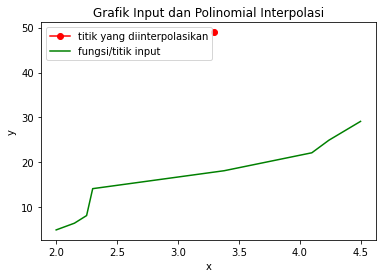

In [7]:
import sympy as sy
from tabulate import tabulate 
import numpy as np
from sympy import *
import matplotlib.pyplot as plt


x_points= eval(input("list of x points: ")) # input titik-titik x
y_points= eval(input("list of y points: ")) # input titik-titik y
eval_x= eval(input("input x value to be approximated: ")) # input titik yang ingin dihitung nilai interpolasinya
xsy = sy.Symbol('x') #memunculkan simbol x menggunakan module sympy

method= eval(input("choose your preferred method.(1= Lagrange, 2=NDD): ")) #input pilihan metode interpolasi(interpolasi lagrange atau Newton divided different)
def LagrangePol(x,xpoints,ypoints): #mendefinisikan metode interpolasi lagrange
    pol = 0 #inisiasi awal bernilai 0                                                  
    n = len(xpoints) # n=banyak titik                                         
    for k in range(n):
        L = 1 #inisiasi nilai L(n,k) bernilai 1                                                 
        for i in range(n):
            if i!=k:
                L*=((x-xpoints[i])/(xpoints[k]-xpoints[i])) #proses perhitungan L(n,k)
        pol += ypoints[k]*L # aproksimasi nilai polinom dengan polinom Lagrange                                  
    return pol
if method==1: #jika memilih metode lagrange
    y_approx= LagrangePol(eval_x, x_points, y_points) #hasil aproksimasi Polinomial Interpolasi Lagrange
    Lagrange_polynomial= simplify(str(LagrangePol(xsy,x_points,y_points))) #hasil polinomial interpolasi dari metode lagrange
    print("Lagrange Polynomial : {0}".format(Lagrange_polynomial)) #memunculkan polinomial interpolasi Lagrange
    print("for x={0}, using Lagrange, y is approximately {1:.5f}".format(eval_x, y_approx)) #memunculkan hasil aproksimasi dengan metode lagrange


def DDTableGenerator(xpoints,ypoints) : #mendefinisikan fungsi untuk membuat table DD
    n = len(xpoints) #n adalah banyaknya titik
    DD = np.zeros((n,n)) #memberi nilai array dengan 0
    for k in range(0,n): #mulai mengisi tabel metode NDD
        DD[k][0]=y_points[k]
    for k in range(1,n): 
        for i in range (0,n-k):
            DD[i][k]=(DD[i+1][k-1]-DD[i][k-1])/(x_points[i+k]-x_points[i]) 
    return DD

def ForwardDD(x,xpoints,ypoints): #mendefinisikan fungsi metode forward NDD 
    DDTable = np.transpose(DDTableGenerator(xpoints,ypoints)) #mereverse sumbu dari array dan mengembalikan array yang telah termodifikasi
    pol = DDTable[0][0] #inisiasi suku pertama polinom
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-x0)(x−𝑥1)...(𝑥−𝑥(n−1))
    for k in range(1,len(DDTable)) :  
        mult_term*=(x-xpoints[k-1])#menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol += DDTable[k][0]*mult_term #menghitung nilai interpolasi forward NDD
    return pol

def BackwardDD(x,xpoints,ypoints) :#mendefinisikan fungsi metode backward NDD 
    DDTable = np.transpose(DDTableGenerator(xpoints,ypoints))  #mereverse sumbu dari array dan mengembalikan array yang telah termodifikasi
    pol = DDTable[0][-1] #inisiasi suku pertama polinom
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-xn)(x-x(n-1))...(x-x1)
    for k in range(1,len(DDTable)) : 
        mult_term*=(x-xpoints[-k]) #menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol += DDTable[k][-1]*mult_term #menghitung nilai interpolasi backward DD
    return pol

xsy = sy.Symbol('x') #memunculkan simbol x menggunakan module sympy       
if method==2: #jika memilih metode NDD
    NDD= eval(input("Forward=1, backward=2: ")) #memilih metode Forward NDD atau Backward NDD
    Table= str(input("Wanna print the DD Table?(y/n): ")).lower() #memilih print tabel DD atau tidak
    tabel_DD= DDTableGenerator(x_points,y_points) #pendefinisian tabel DD yang akan ditampilkan
    if Table== "y": #jika memilih menampilkan tabel
        print("Table Newton Divided Difference") #memberi judul tabel NDD
        judul=["y"] #memberi judul "y" pada tabel NDD
        for i in range (1, len(DDTableGenerator(x_points,y_points))): #menampilkan judul DD1, DD2, dst
            judul.append("DD"+str(i))
        print(tabulate(tabel_DD, headers=judul, tablefmt="fancy_grid")) #menampilkan isi tabel NDD
        
    if Table=='n': #jika memilih tidak menampilkan tabel
        print("")
        
    if NDD==1: #jika memilih metode Forward NDD
        y_approx = ForwardDD(eval_x,x_points,y_points) #menyimpan aproksimasi interpolasi forward NDD
        forw_polynomial = simplify(str(ForwardDD(xsy,x_points,y_points))) #menyimpan hasil polinomial interpolasi forward NDD
        print('Forward NDD Polynomial : {0}'.format(forw_polynomial)) #menampilkan hasil polinomial metode forward NDD
        print('for x = {0} using Forward NDD, y is approximately {1:.5f}'.format(eval_x,y_approx)) #menampilkan hasil aproksimasi metode forward NDD
       
    if NDD==2: #jika memilih metode Backward NDD
        y_approx= BackwardDD(eval_x, x_points, y_points) #menyimpan aproksimasi interpolasi backward NDD
        Back_polynomial= simplify(str(BackwardDD(xsy,x_points,y_points)))#menyimpan hasil polinomial interpolasi backward NDD
        print("Backward NDD Polynomial : {0}".format(Back_polynomial))  #menampilkan hasil polinomial metode backward NDD
        print("for x = {0}, using Backward NDD, y is approximately {1:.5f}". format(eval_x,y_approx))#menampilkan hasil aproksimasi metode backward NDD
        
show= eval(input("Show. (tabel=1, plot=2): ")) #memunculkan pilihan menampilkan tabel atau plot
if show==1: #jika memilih menampilkan tabel
    print("RESULT") #menampilkan judul tabel 
    a= np.append(x_points, eval_x) #menambahkan nilai sampai akhir dari array
    b= np.append(y_points, y_approx) 
    x= np.sort(a) #mengembalikan salinan array yang sudah diurutkan
    y= np.sort(b) 
    print(tabulate({'x':x,'y':y},headers='keys',tablefmt='fancy_grid')) #menampilkan tabel Result

if show==2: #jika memilih menampilkan plot
    x= x_points #menyimpan titik x di variabel x
    x1= eval_x #menyimpan titik yang ingin dihitung nilai interpolasinya di variabel x1
    y= y_points #menyimpan titik y di variabel y
    y1=y_approx #menyimpan nilai hasil interpolasi di variabel y1
    
    plt.plot(eval_x,y_approx,'r-o') #menampilkan plot titik yang diinterpolasikan
    plt.plot(x_points, y_points,'g-') #menampilkan plot fungsi/titik input
    plt.legend(['titik yang diinterpolasikan','fungsi/titik input'])
    plt.xlabel('x') #memberi label x pada plot
    plt.ylabel('y') #memberi label y pada plot
    plt.title('Grafik Input dan Polinomial Interpolasi') #judul dari plot
    plt.show() #menampilkan hasil plot interpolasi

list of x points: [2,2.15,2.25,2.3,3.38,4.1,4.24,4.5]
list of y points: [4.9,6.4,8.1,14.1,18.1,22.1,24.9,29.1]
input x value to be approximated: 3.30
choose your preferred method.(1= Lagrange, 2=NDD): 2
Forward=1, backward=2: 2
Wanna print the DD Table?(y/n): y
Table Newton Divided Difference
╒══════╤═══════════╤════════════╤════════════╤════════════╤════════════╤═══════════╤═════════╕
│    y │       DD1 │        DD2 │        DD3 │        DD4 │        DD5 │       DD6 │     DD7 │
╞══════╪═══════════╪════════════╪════════════╪════════════╪════════════╪═══════════╪═════════╡
│  4.9 │  10       │   28       │ 2195.56    │ -2056.15   │ 1149.6     │ -594.847  │ 269.799 │
├──────┼───────────┼────────────┼────────────┼────────────┼────────────┼───────────┼─────────┤
│  6.4 │  17       │  686.667   │ -641.938   │   358.013  │ -182.853   │   79.6515 │   0     │
├──────┼───────────┼────────────┼────────────┼────────────┼────────────┼───────────┼─────────┤
│  8.1 │ 120       │ -102.917   │   56.18

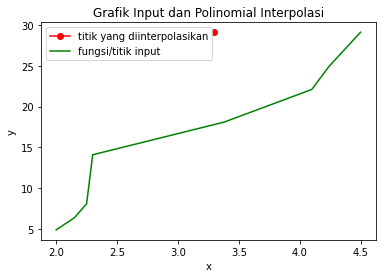

In [6]:
import sympy as sy
from tabulate import tabulate 
import numpy as np
from sympy import *
import matplotlib.pyplot as plt


x_points= eval(input("list of x points: ")) # input titik-titik x
y_points= eval(input("list of y points: ")) # input titik-titik y
eval_x= eval(input("input x value to be approximated: ")) # input titik yang ingin dihitung nilai interpolasinya
xsy = sy.Symbol('x') #memunculkan simbol x menggunakan module sympy

method= eval(input("choose your preferred method.(1= Lagrange, 2=NDD): ")) #input pilihan metode interpolasi(interpolasi lagrange atau Newton divided different)
def LagrangePol(x,xpoints,ypoints): #mendefinisikan metode interpolasi lagrange
    pol = 0 #inisiasi awal bernilai 0                                                  
    n = len(xpoints) # n=banyak titik                                         
    for k in range(n):
        L = 1 #inisiasi nilai L(n,k) bernilai 1                                                 
        for i in range(n):
            if i!=k:
                L*=((x-xpoints[i])/(xpoints[k]-xpoints[i])) #proses perhitungan L(n,k)
        pol += ypoints[k]*L # aproksimasi nilai polinom dengan polinom Lagrange                                  
    return pol
if method==1: #jika memilih metode lagrange
    y_approx= LagrangePol(eval_x, x_points, y_points) #hasil aproksimasi Polinomial Interpolasi Lagrange
    Lagrange_polynomial= simplify(str(LagrangePol(xsy,x_points,y_points))) #hasil polinomial interpolasi dari metode lagrange
    print("Lagrange Polynomial : {0}".format(Lagrange_polynomial)) #memunculkan polinomial interpolasi Lagrange
    print("for x={0}, using Lagrange, y is approximately {1:.5f}".format(eval_x, y_approx)) #memunculkan hasil aproksimasi dengan metode lagrange


def DDTableGenerator(xpoints,ypoints) : #mendefinisikan fungsi untuk membuat table DD
    n = len(xpoints) #n adalah banyaknya titik
    DD = np.zeros((n,n)) #memberi nilai array dengan 0
    for k in range(0,n): #mulai mengisi tabel metode NDD
        DD[k][0]=y_points[k]
    for k in range(1,n): 
        for i in range (0,n-k):
            DD[i][k]=(DD[i+1][k-1]-DD[i][k-1])/(x_points[i+k]-x_points[i]) 
    return DD

def ForwardDD(x,xpoints,ypoints): #mendefinisikan fungsi metode forward NDD 
    DDTable = np.transpose(DDTableGenerator(xpoints,ypoints)) #mereverse sumbu dari array dan mengembalikan array yang telah termodifikasi
    pol = DDTable[0][0] #inisiasi suku pertama polinom
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-x0)(x−𝑥1)...(𝑥−𝑥(n−1))
    for k in range(1,len(DDTable)) :  
        mult_term*=(x-xpoints[k-1])#menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol += DDTable[k][0]*mult_term #menghitung nilai interpolasi forward NDD
    return pol

def BackwardDD(x,xpoints,ypoints) :#mendefinisikan fungsi metode backward NDD 
    DDTable = np.transpose(DDTableGenerator(xpoints,ypoints))  #mereverse sumbu dari array dan mengembalikan array yang telah termodifikasi
    pol = DDTable[0][-1] #inisiasi suku pertama polinom
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-xn)(x-x(n-1))...(x-x1)
    for k in range(1,len(DDTable)) : 
        mult_term*=(x-xpoints[-k]) #menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol += DDTable[k][-1]*mult_term #menghitung nilai interpolasi backward DD
    return pol

xsy = sy.Symbol('x') #memunculkan simbol x menggunakan module sympy       
if method==2: #jika memilih metode NDD
    NDD= eval(input("Forward=1, backward=2: ")) #memilih metode Forward NDD atau Backward NDD
    Table= str(input("Wanna print the DD Table?(y/n): ")).lower() #memilih print tabel DD atau tidak
    tabel_DD= DDTableGenerator(x_points,y_points) #pendefinisian tabel DD yang akan ditampilkan
    if Table== "y": #jika memilih menampilkan tabel
        print("Table Newton Divided Difference") #memberi judul tabel NDD
        judul=["y"] #memberi judul "y" pada tabel NDD
        for i in range (1, len(DDTableGenerator(x_points,y_points))): #menampilkan judul DD1, DD2, dst
            judul.append("DD"+str(i))
        print(tabulate(tabel_DD, headers=judul, tablefmt="fancy_grid")) #menampilkan isi tabel NDD
        
    if Table=='n': #jika memilih tidak menampilkan tabel
        print("")
        
    if NDD==1: #jika memilih metode Forward NDD
        y_approx = ForwardDD(eval_x,x_points,y_points) #menyimpan aproksimasi interpolasi forward NDD
        forw_polynomial = simplify(str(ForwardDD(xsy,x_points,y_points))) #menyimpan hasil polinomial interpolasi forward NDD
        print('Forward NDD Polynomial : {0}'.format(forw_polynomial)) #menampilkan hasil polinomial metode forward NDD
        print('for x = {0} using Forward NDD, y is approximately {1:.5f}'.format(eval_x,y_approx)) #menampilkan hasil aproksimasi metode forward NDD
       
    if NDD==2: #jika memilih metode Backward NDD
        y_approx= BackwardDD(eval_x, x_points, y_points) #menyimpan aproksimasi interpolasi backward NDD
        Back_polynomial= simplify(str(BackwardDD(xsy,x_points,y_points)))#menyimpan hasil polinomial interpolasi backward NDD
        print("Backward NDD Polynomial : {0}".format(Back_polynomial))  #menampilkan hasil polinomial metode backward NDD
        print("for x = {0}, using Backward NDD, y is approximately {1:.5f}". format(eval_x,y_approx))#menampilkan hasil aproksimasi metode backward NDD
        
show= eval(input("Show. (tabel=1, plot=2): ")) #memunculkan pilihan menampilkan tabel atau plot
if show==1: #jika memilih menampilkan tabel
    print("RESULT") #menampilkan judul tabel 
    a= np.append(x_points, eval_x) #menambahkan nilai sampai akhir dari array
    b= np.append(y_points, y_approx) 
    x= np.sort(a) #mengembalikan salinan array yang sudah diurutkan
    y= np.sort(b) 
    print(tabulate({'x':x,'y':y},headers='keys',tablefmt='fancy_grid')) #menampilkan tabel Result

if show==2: #jika memilih menampilkan plot
    x= x_points #menyimpan titik x di variabel x
    x1= eval_x #menyimpan titik yang ingin dihitung nilai interpolasinya di variabel x1
    y= y_points #menyimpan titik y di variabel y
    y1=y_approx #menyimpan nilai hasil interpolasi di variabel y1
    
    plt.plot(eval_x,y_approx,'r-o') #menampilkan plot titik yang diinterpolasikan
    plt.plot(x_points, y_points,'g-') #menampilkan plot fungsi/titik input
    plt.legend(['titik yang diinterpolasikan','fungsi/titik input'])
    plt.xlabel('x') #memberi label x pada plot
    plt.ylabel('y') #memberi label y pada plot
    plt.title('Grafik Input dan Polinomial Interpolasi') #judul dari plot
    plt.show() #menampilkan hasil plot interpolasi

### Program menghitung interpolasi


- program akan meminta list titik-titik x 
- program akan meminta list titik-titik y
- program akan meminta titik x yang akan diinterpolasikan
- program akan meminta pilihan metode yaitu Lagrange atau NDD
- pilihan 1 untuk memilih metode Lagrange
- pilihan 2 untuk memilih metode NDD
- jika memilih 1 maka akan muncul nilai dari hasil polinomial Lagrange dan nilai interpolasinya
- jika memilih 2 akan terdapat pilihan metode forward atau backward NDD
- jika memilih metode forward(1) maka akan muncul nilai dari hasil polinomial forward dan nilai interpolasinya. sedangkan, jika memilih metode backward(1) maka akan muncul nilai dari hasil polinomial backward dan nilai interpolasinya
- kemudian akan ada opsi menampilkan tabel DD atau tidak
- dipilihan yang terakhir akan ada pilihan untuk menampilkan tabel result atau plot.

### Nomor 2
- dengan menggunakan program di nomor 1 maka akan dicari nilai interpolasi jarak yang telah ia tempuh ketika waktu menunjukkan pukul 09:18:30.
- perbandingan output yang dihasilkan dari ketiga metode adalah= 
- dengan metode lagrange pada titik 3.30 diperoleh hasil interpolasi= 48.97769
- dengan metode NDD Forward pada titik 3.30 diperoleh hasil interpolasi= 48.97769
- dengan metode NDD Backward pada titik 3.30 diperoleh hasil interpolasi= 29.10000
- berdasarkan hasil tersebut terdapat adanya kesamaan pada metode lagrange dan forward NDD, sedangkan dengan metode NDD backward menghasilkan output yang berbeda jauh dengan metode lagrange dan forward NDD, hal ini seharusnya tidak terjadi atau seharusnya ke3 metode menghasilkan hasil yang sama.